In [1]:
import numpy as np

### Histograms
We can graph histograms using a Python module known as *Matplotlib*.

For now, familiarize yourself with the following syntax to draw a histogram:

In [2]:
from matplotlib import pyplot as plt
data = np.array([1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4, 5])
plt.hist(data)

(array([ 3.,  0.,  5.,  0.,  0.,  2.,  0.,  4.,  0.,  1.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

When we enter `plt.hist` with no keyword arguments, matplotlib will automatically make a histogram with 10 bins of equal width that span the entire range of our data.

For a dataset like this, our histogram table would look like this:

| Bin	   | Number of Values | 
| -------- |:----------------:| 
| (0, 5)   | 2                | 
| (6, 10)  | 10               | 
| (11, 15) | 11               | 
| ...	   | ...              | 
| (46, 50) | 3                | 

If you want a different number of bins, use the keyword bins. For instance, the following code would give us 5 bins, instead of 10:

(array([ 3.,  5.,  0.,  2.,  4.,  1.]),
 array([ 1.        ,  1.66666667,  2.33333333,  3.        ,  3.66666667,
         4.33333333,  5.        ]),
 <a list of 6 Patch objects>)

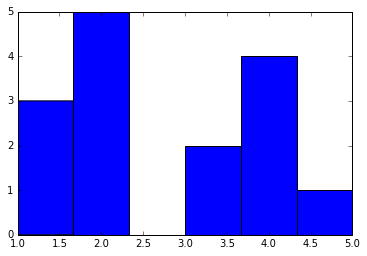

In [3]:
plt.hist(data, bins=6)

If you want a different range, you can pass in the minimum and maximum values that you want to histogram using the keyword range. We pass in a tuple of two numbers. The first number is the minimum value that we want to plot and the second value is the number that we want to plot up to, but not including.

(array([ 3.,  5.,  2.,  4.,  1.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 5 Patch objects>)

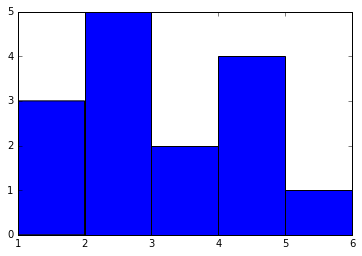

In [4]:
plt.hist(data, bins=5, range=(1, 6))

### Different Types of Distributions
Histograms and their datasets can be classified based on the shape of the graphed values. In the next two exercises, we'll look at two different ways of describing histograms.

One way to classify a dataset is by counting the number of distinct peaks present in the graph. Peaks represent concentrations of data. Let's look at the following examples:

- A *unimodal* dataset has only one distinct peak.

![img](images/unimodal_new.svg "unimodal")

- A *bimodal dataset* has two distinct peaks. This often happens when the data contains two different populations.
- A *multimodal dataset* has more than two peaks.
- A *uniform dataset* doesn't have any distinct peaks.

We can further classify unimodal distributions by describing where most of the numbers are relative to the peak.

- A *symmetric dataset* has equal amounts of data on both sides of the peak. Both sides should look about the same. histogram

- A *skew-right dataset* has a long tail on the right of the peak, but most of the data is on the left. histogram

- A *skew-left dataset* has a long tail on the left of the peak, but most of the data is on the right.

### Normal Distribution
The most common distribution in statistics is known as the normal distribution, which is a symmetric, unimodal distribution.

Lots of things follow a normal distribution:

- The heights of a large group of people
- Blood pressure measurements for a group of healthy people
- Errors in measurements

We can generate our own normally distributed datasets using NumPy. Using these datasets can help us better understand the properties and behavior of different distributions. We can also use them to model results, which we can then use as a comparison to real data.

In order to create these datasets, we need to use a random number generator. The NumPy library has several functions for generating random numbers, including one specifically built to generate a set of numbers that fit a normal distribution: `np.random.normal`. This function takes the following keyword arguments:

- loc: the mean for the normal distribution
- scale: the standard deviation of the distribution
- size: the number of random numbers to generate

In [5]:
a = np.random.normal(0, 1, size=100000)

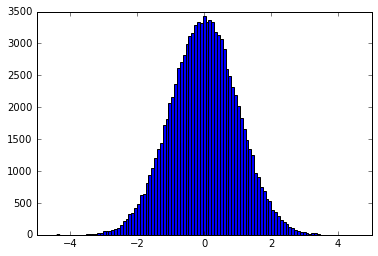

In [6]:
plt.hist(a, bins= 100)
plt.show()

#If we were to plot this set of random numbers as a histogram, it would look like this:

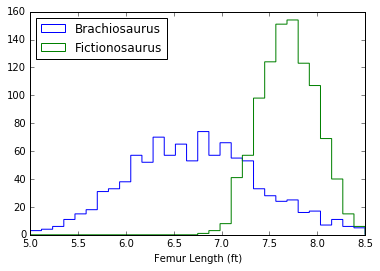

In [7]:
# Example
# One paleontologist is studying two types of dinosaurs: brachiosaurus and fictionosaurus.
# Brachiosaurus
b_data = np.random.normal(6.7, 0.7, 1000)

# Fictionosaurus
f_data = np.random.normal(7.7, 0.3, 1000)

plt.hist(b_data,
         bins=30, range=(5, 8.5), histtype='step',
         label='Brachiosaurus')
plt.hist(f_data,
         bins=30, range=(5, 8.5), histtype='step',
         label='Fictionosaurus')
plt.xlabel('Femur Length (ft)')
plt.legend(loc=2)
plt.show()


### Standard Deviations and Normal Distribution

We know that the standard deviation affects the "shape" of our normal distribution. The last exercise helps to give us a more quantitative understanding of this.

Suppose that we have a normal distribution with a mean of 50 and a standard deviation of 10. When we say "within one standard deviation of the mean", this is what we are saying mathematically:
```
lower_bound = mean - std
            = 50 - 10
            = 40

upper_bound = mean + std
            = 50 + 10
            = 60
```
It turns out that we can expect about 68% of our dataset to be between 40 and 60, for this distribution.

In fact, here are a few more helpful rules for normal distributions:

- 68% of our samples will fall between +/- 1 standard deviation of the mean
- 95% of our samples will fall between +/- 2 standard deviations of the mean
- 99.7% of our samples will fall between +/- 3 standard deviations of the mean

### Binomial Distributions
For instance, suppose we want to know the different probabilities of our basketball player making 1, 2, 3, etc. out of 10 shots.

NumPy has a function for generating binomial distributions: `np.random.binomial`, which we can use to determine the probability of different outcomes.

The function will return the number of successes for each "experiment".

It takes the following arguments:

- N: The number of samples or trials
- P: The probability of success
- size: The number of experiments
Let's generate a bunch of "experiments" of our basketball player making 10 shots. We choose a big N to be sure that our probabilities converge on the correct answer.

In [8]:
# Let's generate 10,000 "experiments"
# N = 10 shots
# P = 0.30 (30% he'll get a free throw)

a = np.random.binomial(10, 0.30, size=10000)

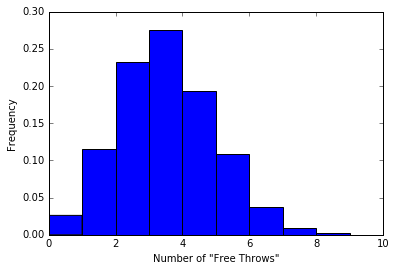

In [9]:
plt.hist(a, range=(0, 10), bins=10, normed=True)
plt.xlabel('Number of "Free Throws"')
plt.ylabel('Frequency')
plt.show()

The binomial distribution is important because it allows us to know how likely a certain outcome is, even when it's not the expected one. From this graph, we can see that it's not that unlikely an outcome for our basketball player to get 4 free throws out of 10. However, it would be pretty unlikely for him to get all 10.


### Binomial Distributions and Probability

Our basketball player has a 30% chance of making any individual basket. He took 10 shots and made 4 of them, even though we only expected him to make 3. What percent chance did he have of making those 4 shots?

We can calculate a different probability by counting the percent of experiments with the same outcome, using the np.mean function.

Remember that taking the mean of a logical statement will give us the percent of values that satisfy our logical statement.

Let's calculate the probability that he makes 4 baskets:

In [10]:
a = np.random.binomial(10, 0.30, size=10000)
np.mean(a == 4)

0.2026

So, our basketball player has a roughly 20% chance of making 4 baskets

This suggests that what we observed wasn't that unlikely. It's quite possible that he hasn't got any better; he just got lucky.

In [11]:
np.mean(a == 8)

0.0015